In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [7]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

num_classes = 10
num_feature = 784 #x_train.shape[1]*x_train.shape[2]

x_train, x_test = tf.reshape(x_train, [-1, 784]),  tf.reshape(x_test, [-1, 784])
x_train = x_train / 255.
x_test = x_test / 255.

In [8]:
from tensorflow.keras import Model, layers

class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(128, activation=tf.nn.relu)
        self.fc2 = layers.Dense(256, activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)
        
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x
    
neural_net = NeuralNet()

In [9]:
def cross_entropy_loss(x,y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:
lr = 0.003
optimizer = tf.optimizers.SGD(lr)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        
    trainable_variables = neural_net.trainable_variables
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [11]:
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

epoch = 40
display_epoch = 4

for epo in range(1, epoch+1):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        run_optimization(batch_x, batch_y)
        
    if epo % display_epoch == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("epoch: ", epo, ", loss: ", loss.numpy(), ", acc: ", acc.numpy())

epoch:  4 , loss:  1.8956543 , acc:  0.785
epoch:  8 , loss:  1.7307 , acc:  0.855
epoch:  12 , loss:  1.6670092 , acc:  0.89
epoch:  16 , loss:  1.6539196 , acc:  0.895
epoch:  20 , loss:  1.5951049 , acc:  0.94
epoch:  24 , loss:  1.6244568 , acc:  0.885
epoch:  28 , loss:  1.5979679 , acc:  0.925
epoch:  32 , loss:  1.5886139 , acc:  0.93
epoch:  36 , loss:  1.5836878 , acc:  0.92
epoch:  40 , loss:  1.5746083 , acc:  0.935


In [13]:
pred = neural_net(x_test)
print("Test Accuracy : ", accuracy(pred, y_test).numpy())

Test Accuracy :  0.927


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [15]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

num_classes = 10
num_feature = 784 #x_train.shape[1]*x_train.shape[2]

x_train = x_train / 255.
x_test = x_test / 255.

In [16]:
layer1 = Flatten(input_shape = (28,28))
layer2 = Dense(128, activation = 'relu')
layer3 = Dense(256, activation = 'relu')
layer4 = Dense(10)

In [17]:
mlp = Sequential([layer1, layer2, layer3, layer4])

In [22]:
mlp.compile(optimizer = tf.keras.optimizers.SGD(0.01),
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
            metrics = ['accuracy'])

In [36]:
result = mlp.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0799 - accuracy: 0.9769
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0751 - accuracy: 0.9787
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0714 - accuracy: 0.9795
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0675 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9824


In [26]:
mlp.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1226 - accuracy: 0.9631


[0.12262395024299622, 0.963100016117096]

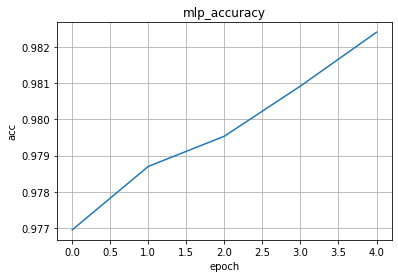

In [38]:
plt.plot(result.history['accuracy'])
plt.title('mlp_accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.grid()